In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 143
NUM_SAMPLES = 50

In [2]:
np.random.seed(SEED)

In [3]:
def generate_synthetic_data(n_samples):
    """generate dummy data for linear regression"""
    X = np.array(range(n_samples))
    random_noise = np.random.uniform(-10, 20, size=n_samples)
    y = 3.5*X + random_noise
    return X, y

In [8]:
X, y = generate_synthetic_data(NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         19.33066147]
 [ 1.         10.59058592]
 [ 2.         -0.32317836]
 [ 3.         19.00719486]
 [ 4.         13.15270727]]


In [23]:
df = pd.DataFrame(data, columns = ["X", "y"])
print(df.head())
X = df[["X"]].values
y = df[["y"]].values

     X          y
0  0.0  19.330661
1  1.0  10.590586
2  2.0  -0.323178
3  3.0  19.007195
4  4.0  13.152707


Text(0.5, 0, 'X')

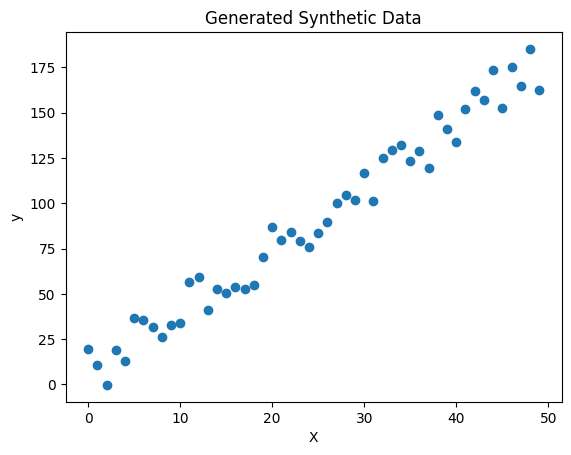

In [24]:
plt.scatter(X, y)
plt.title("Generated Synthetic Data")
plt.ylabel("y")
plt.xlabel("X")

In [25]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [27]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


In [28]:
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [29]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]

X_val = X[val_start:val_end]
y_val = y[val_start:val_end]

X_test = X[test_start:]
y_test = y[test_start:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (35, 1), y_train shape: (35, 1)
X_val shape: (7, 1), y_val shape: (7, 1)
X_test shape: (8, 1), y_test shape: (8, 1)


In [30]:
def standardize_data(data):
    mu = np.mean(data)
    sigma = np.std(data)
    return (data - mu)/sigma

In [73]:
X_mu = np.mean(X)
X_std = np.std(X)

y_mu = np.mean(y)
y_std = np.std(y)

In [32]:
X_train = standardize_data(X_train)
y_train = standardize_data(y_train)

X_val = standardize_data(X_val)
y_val = standardize_data(y_val)

X_test = standardize_data(X_test)
y_test = standardize_data(y_test)

In [40]:
print(f"Mu X_train: {round(np.mean(X_train, axis=0)[0], 2)}, Sigma X_train: {round(np.std(X_train, axis=0)[0], 2)}")
print(f"Mu y_train: {round(np.mean(y_train, axis=0)[0], 2)}, Sigma y_train: {round(np.std(y_train, axis=0)[0], 2)}")

print(f"Mu X_val: {round(np.mean(X_val, axis=0)[0], 2)}, Sigma X_val: {round(np.std(X_val, axis=0)[0], 2)}")
print(f"Mu y_val: {round(np.mean(y_val, axis=0)[0], 2)}, Sigma y_val: {round(np.std(y_val, axis=0)[0], 2)}")

print(f"Mu X_test: {round(np.mean(X_test, axis=0)[0], 2)}, Sigma X_test: {round(np.std(X_test, axis=0)[0], 2)}")
print(f"Mu y_test: {round(np.mean(y_test, axis=0)[0], 2)}, Sigma y_test: {round(np.std(y_test, axis=0)[0], 2)}")

Mu X_train: 0.0, Sigma X_train: 1.0
Mu y_train: -0.0, Sigma y_train: 1.0
Mu X_val: -0.0, Sigma X_val: 1.0
Mu y_val: 0.0, Sigma y_val: 1.0
Mu X_test: 0.0, Sigma X_test: 1.0
Mu y_test: 0.0, Sigma y_test: 1.0


In [41]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [46]:
W = 0.01*np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(f"W: shape: {W.shape}")
print(f"b: shape: {b.shape}")

W: shape: (1, 1)
b: shape: (1, 1)


In [48]:
y_pred = np.dot(X_train, W) + b
print(f"y_pred shape: {y_pred.shape}")

y_pred shape: (35, 1)


In [50]:
# loss
N = len(y_train)
loss = (1/N)*np.sum((y_train - y_pred)**2)
print(f"Training Loss: {loss:.2f}")

Training Loss: 0.98


In [51]:
dW = -(2/N)*np.sum((y_train - y_pred)*X_train)
db = -(2/N)*np.sum((y_train - y_pred)*1)

In [53]:
LEARNING_RATE = 1e-1

In [54]:
W = W - LEARNING_RATE*dW
b = b - LEARNING_RATE*db

In [55]:
NUM_EPOCHS = 100

In [57]:
W = 0.01* np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

for epoch_num in range(NUM_EPOCHS):
    
    y_pred = np.dot(X_train, W) + b

    loss = (1/len(y_train))*np.sum((y_train - y_pred)**2)

    if epoch_num%10 == 0:
        print(f"Epoch {epoch_num}: Loss: {loss:.3f}")

    dW = -(2/len(y_train))*np.sum((y_train - y_pred)*X_train)
    db = -(2/len(y_train))*np.sum((y_train - y_pred)*1)

    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db


Epoch 0: Loss: 0.989
Epoch 10: Loss: 0.041
Epoch 20: Loss: 0.030
Epoch 30: Loss: 0.030
Epoch 40: Loss: 0.030
Epoch 50: Loss: 0.030
Epoch 60: Loss: 0.030
Epoch 70: Loss: 0.030
Epoch 80: Loss: 0.030
Epoch 90: Loss: 0.030


In [58]:
pred_train = W*X_train + b
pred_val = W*X_val + b
pred_test = W*X_test + b

In [60]:
train_mse = np.mean((y_train - pred_train)**2)
val_mse = np.mean((y_val - pred_val)**2)
test_mse = np.mean((y_test - pred_test)**2)

print(f"Train MSE: {train_mse:.3f}, Val MSE: {val_mse:.3f}, Test MSE: {test_mse:.3f}")

Train MSE: 0.030, Val MSE: 0.027, Test MSE: 0.041


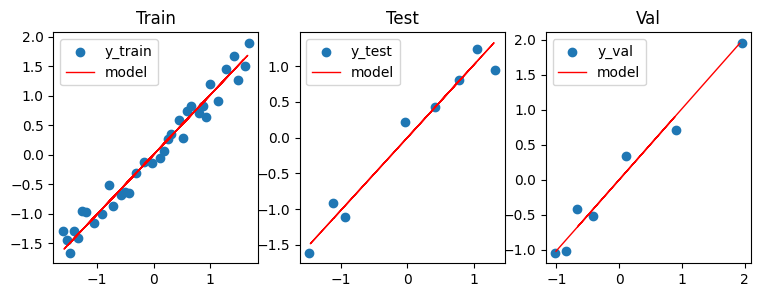

In [72]:
plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.scatter(X_train, y_train, label="y_train")
plt.plot(pred_train, X_train, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Train")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X_val, y_val, label="y_val")
plt.plot(pred_val, X_val, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Val")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X_test, y_test, label="y_test")
plt.plot(pred_test, X_test, color="red", linewidth=1, linestyle="-", label="model")
plt.title("Test")
plt.legend()

plt.show()

In [80]:
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mu - np.sum(W_unscaled*X_mu)
print("Initial Model -> y = 3.5X + 0.0")
print(f"Final Model -> y = {W_unscaled[0][0]:.3f}X + {b_unscaled[0]:.3f}")

Initial Model -> y = 3.5X + 0.0
Final Model -> y = 3.499X + 4.687


### Pytorch